# Home Assignment No. 3: Part 2

In this part of the homework you are to solve several problems related to machine learning algorithms.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

# Clustering

## Task 1 (1 + 2 = 3 pt.): Practice with Different Clustering Algorithms

### Task 1.1 (1 pt.)

Try `KMeans`, `Gaussian Mixture` and **two** more clustering algorithms from `sklearn`. 
To evaluate clustering performance use **two** clustering metrics: `silhouette score`
and `adjusted mutual information`.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;


In [37]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

True number of clusters is 15


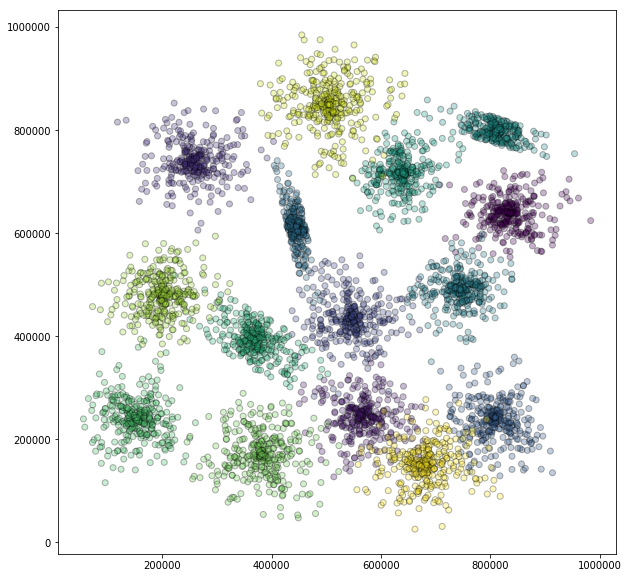

In [38]:
points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')
plt.show()

In [39]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.model_selection import ParameterGrid

import warnings
warnings.filterwarnings("ignore")

In [40]:
import tqdm
from tqdm import tqdm_notebook

In [41]:
silhouette_scores = {}
adjusted_mutual_informations = {}

In [42]:
model = KMeans

parameters_dict = {
    'n_clusters': [15],
    'init': ['k-means++', 'random'],
    'n_init': [10, 15, 20],
    'max_iter': [150, 350, 450],
    'algorithm': ['full', 'elkan']
}

parameterGrid = ParameterGrid(parameters_dict)

_silhouette_scores = []
_adjusted_mutual_informations = []
for i in tqdm.tqdm(range(len(parameterGrid))):
    clf = model(n_clusters=parameterGrid[i]['n_clusters'], 
                init=parameterGrid[i]['init'],
                n_init=parameterGrid[i]['n_init'],
                max_iter=parameterGrid[i]['max_iter'],
                algorithm=parameterGrid[i]['algorithm'])
    
    prediction = clf.fit_predict(points)
    
    _silhouette_scores.append(silhouette_score(points, prediction))
    _adjusted_mutual_informations.append(adjusted_mutual_info_score(labels, prediction))

silhouette_scores[model.__name__] = (parameterGrid[np.argmax(_silhouette_scores)], 
                                     np.max(_silhouette_scores), model)
adjusted_mutual_informations[model.__name__] = (parameterGrid[np.argmax(_adjusted_mutual_informations)], 
                                                np.max(_adjusted_mutual_informations), model)

100%|██████████| 36/36 [00:21<00:00,  1.69it/s]


In [43]:
model = Birch

parameters_dict = {
    'n_clusters': [15],
    'threshold': [0.6, 0.9],
    'branching_factor': [25, 70, 150]
}

parameterGrid = ParameterGrid(parameters_dict)

_silhouette_scores = []
_adjusted_mutual_informations = []
for i in tqdm.tqdm(range(len(parameterGrid))):
    clf = model(n_clusters=parameterGrid[i]['n_clusters'], 
                threshold=parameterGrid[i]['threshold'],
                branching_factor=parameterGrid[i]['branching_factor'])
    prediction = clf.fit_predict(points)
    _silhouette_scores.append(silhouette_score(points, prediction))
    _adjusted_mutual_informations.append(adjusted_mutual_info_score(labels, prediction))
    
silhouette_scores[model.__name__] = (parameterGrid[np.argmax(_silhouette_scores)], 
                                     np.max(_silhouette_scores), model)

adjusted_mutual_informations[model.__name__] = (parameterGrid[np.argmax(_adjusted_mutual_informations)], 
                                                np.max(_adjusted_mutual_informations), model)

100%|██████████| 6/6 [00:08<00:00,  1.35s/it]


In [44]:
model = AgglomerativeClustering

parameters_dict = {
    'n_clusters': [15],
    'compute_full_tree': [True, False],
    'linkage': ['ward', 'complete', 'average']
}

parameterGrid = ParameterGrid(parameters_dict)

_silhouette_scores = []
_adjusted_mutual_informations = []
for i in tqdm.tqdm(range(len(parameterGrid))):
    clf = model(n_clusters=parameterGrid[i]['n_clusters'], 
                compute_full_tree=parameterGrid[i]['compute_full_tree'],
                linkage=parameterGrid[i]['linkage'])
    prediction = clf.fit_predict(points)
    _silhouette_scores.append(silhouette_score(points, prediction))
    _adjusted_mutual_informations.append(adjusted_mutual_info_score(labels, prediction))
    
silhouette_scores[model.__name__] = (parameterGrid[np.argmax(_silhouette_scores)], 
                           np.max(_silhouette_scores), model)
adjusted_mutual_informations[model.__name__] = (parameterGrid[np.argmax(_adjusted_mutual_informations)], 
                           np.max(_adjusted_mutual_informations), model)

100%|██████████| 6/6 [00:04<00:00,  1.23it/s]


In [45]:
model = GaussianMixture

parameters_dict = {
    'n_components': [15],
    'covariance_type': ['full', 'tied', 'diag'],
    'n_init': [8, 15, 20],
    'max_iter': [200, 300, 400]
}

parameterGrid = ParameterGrid(parameters_dict)

_silhouette_scores = []
_adjusted_mutual_informations = []
for i in tqdm.tqdm(range(len(parameterGrid))):
    clt = model(n_components=parameterGrid[i]['n_components'], 
                covariance_type=parameterGrid[i]['covariance_type'],
                n_init=parameterGrid[i]['n_init'],
                max_iter=parameterGrid[i]['max_iter'])
    
    prediction = clf.fit_predict(points)
    _silhouette_scores.append(silhouette_score(points, prediction))
    _adjusted_mutual_informations.append(adjusted_mutual_info_score(labels, prediction))
    
silhouette_scores[model.__name__] = (parameterGrid[np.argmax(_silhouette_scores)], 
                           np.max(_silhouette_scores), model)
adjusted_mutual_informations[model.__name__] = (parameterGrid[np.argmax(_adjusted_mutual_informations)], 
                                                np.max(_adjusted_mutual_informations), model)

100%|██████████| 27/27 [00:20<00:00,  1.29it/s]


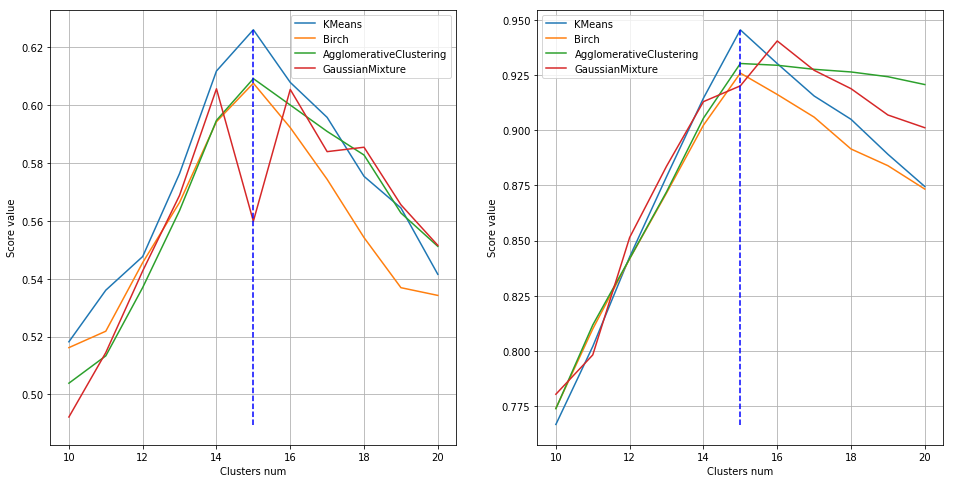

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs = axs.flatten()

_MAX_S, _MIN_S = -10, 10
_MAX_A, _MIN_A = -10, 10

for info, metric in zip([silhouette_scores, adjusted_mutual_informations], 
                ['silhouette_scores', 'adjusted_mutual_informations']):
    
    for model_name, (params, value, model) in info.items():
        
        silhouette = []
        adjusted_mutual_info = []
        
        clusters_num = list(range(10, 21, 1))
        
        for n_clusters in clusters_num:
            
            if model_name == 'GaussianMixture':
                params['n_components'] = n_clusters
            else:
                params['n_clusters'] = n_clusters
    
            clf = model(**params)
            _labels = clf.fit_predict(points)
            
            _silhouette_score = silhouette_score(points, _labels)
            _adjusted_mutual_info_score = adjusted_mutual_info_score(labels, 
                                                                     _labels)
        
            if _MIN_S > _silhouette_score:
                _MIN_S = _silhouette_score
                
            if _MAX_S < _silhouette_score:
                _MAX_S = _silhouette_score
                
            if _MIN_A > _adjusted_mutual_info_score:
                _MIN_A = _adjusted_mutual_info_score
                
            if _MAX_A < _adjusted_mutual_info_score:
                _MAX_A = _adjusted_mutual_info_score
        
            silhouette.append(_silhouette_score)
            adjusted_mutual_info.append(_adjusted_mutual_info_score)
    
        if metric == 'silhouette_scores':
            axs[0].plot(clusters_num, silhouette, 
                        label=model_name)
        else:
            axs[1].plot(clusters_num, adjusted_mutual_info, 
                        label=model_name)
        

axs[0].plot([15, 15], [_MIN_S, _MAX_S], 'b--')
axs[1].plot([15, 15], [_MIN_A, _MAX_A], 'b--')
axs[0].set_xlabel('Clusters num')
axs[1].set_xlabel('Clusters num')
axs[0].set_ylabel('Score value')
axs[1].set_ylabel('Score value')

axs[0].legend()
axs[0].grid()
axs[1].legend()
axs[1].grid()

In [47]:
n_clusters = [12, 15, 18]

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(23, 23))

for axs, (model_name, (params, value, model)) in zip(axes, silhouette_scores.items()):
    
    for ax, clusters in zip(axs, n_clusters):
        
        if model_name == 'GaussianMixture':
            params['n_components'] = clusters
        else:
            params['n_clusters'] = clusters

        clf = model(**params)
        _labels = clf.fit_predict(points)
        
        ax.set_title('{} with {} clusters'.format(model_name, clusters))
        ax.scatter(points[:, 0], points[:, 1], c = _labels, alpha=.4, edgecolor='white')
        ax.axis('off')

### Task 1.2 (2 pt.): Finding the Number of Clusters with Bootstrap

For a chosen algorithm find the best number of clusters using bootstrap.

So, first, based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.

1. **(1 pt.)** Estimate variance of the metric and construct normal 95% **confidence intervals**;
2. **(1 pt.)** **Plot the metric** with the corresponding confidence intervals and choose the best number of clusters.

In [48]:
method = KMeans

In [49]:
import tqdm
from tqdm import tqdm_notebook

### BEGIN Solution

cluster_ns = list([i for i in range(11, 21, 1)])
sample_number = 50
quatile = 1.96

sample_size = points.shape[0]

bounds = np.zeros((3, len(cluster_ns)))

for i_cn, n_clusters in enumerate(cluster_ns):
    
    print('Current clusters num : {}'.format(n_clusters))
    
    silhouette_score_results = []
    
    for sample_index in range(sample_number):
        model = method(n_clusters=n_clusters)
        
        ds = np.random.randint(0, sample_size, size=(sample_size))
        ds = points[ds, :]
        
        _labels = model.fit_predict(ds)
        
        score = silhouette_score(ds, _labels)
        silhouette_score_results += [score]
        
    silhouette_score_results = np.array(silhouette_score_results)
    mean = np.mean(silhouette_score_results)
    std  = np.std(silhouette_score_results)
    
    bounds[0, i_cn] = mean - quatile * std / np.sqrt(sample_number)
    bounds[1, i_cn] = mean
    bounds[2, i_cn] = mean + quatile * std / np.sqrt(sample_number)
    
### END Solution

Current clusters num : 11
Current clusters num : 12
Current clusters num : 13
Current clusters num : 14
Current clusters num : 15
Current clusters num : 16
Current clusters num : 17
Current clusters num : 18
Current clusters num : 19
Current clusters num : 20


In [50]:
bounds = np.row_stack((bounds, np.array(cluster_ns)))
df = pd.DataFrame(data=bounds.T, columns=['left', 'mean', 'right', 'Numbers of clusters'])
df = pd.melt(df, id_vars=['Numbers of clusters'], value_name='Silhouette score', value_vars=['left', 'mean', 'right'], var_name='pos')

In [51]:
import seaborn as sns

plt.figure(figsize=(13, 8))
sns.lineplot(x='Numbers of clusters', y='Silhouette score', data=df)

<br>

# Dimentionality Reduction and Manifold Learning

## Task 2 (1 + 1 + 2 + 1 = 5 pt.)

Assume that you have $n$ points in $D$ dimensional space:

$$u_1, ..., u_n \in \mathbb R^D.$$

There exist a *linear* data transformation $F(u): \mathbb R^D \rightarrow \mathbb R^d, D >> d$ such that:

$$(1-\delta) \|u_i - u_j\|^2 \leq \|F(u_i) - F(u_j)\|^2\leq (1+\delta) \|u_i - u_j\|^2$$

with high probability.

The transformation $F(u)$ is: $F(u) = \tfrac{1}{\sqrt d}Xu$, and $X \in \mathbb R^{d \times D}$ is a random matrix, components of which are independent identically distributed $X_{ij} \sim \mathcal{N}(0, 1)$.

This statement means that there exists a matrix that reduces the original dimensionality such that pairwise distances are not distorted much. This is a theoretical probabilistic result that *guarantees* you such a transformation. We will obtain a bound on $d$ for which this result holds true.

**Chernoff inequality.** This unequality states a bound on distribution tail.

$$\mathbb P(X \geq t) \leq \frac{\mathbb E \exp(\lambda X)}{\exp(\lambda t)}$$

**Definition.** Random variable $X$ is called subexponential with parameters $(\sigma^2, b)$, if for all $\lambda: |\lambda| < \frac{1}{b}$ the following is true:

$$\mathbb E \exp(\lambda (X - \mathbb E X)) \leq \exp\left(\frac{\lambda^2\sigma^2}{2}\right)$$

**Fact.** $\chi^2$ distribution with $d$ degrees of freedom is a sum of squares of $d$ independent standard gaussian random variables.


**Fact.** $\chi^2$ distribution with $d$ degrees of freedom is subexponential with parameters $\sigma^2 = 4d, b = 4$

<br>

### Task 2.1 (1 pt.):

Using the above information, prove that for $Y \sim \chi^2$ with $d$ degrees of freedom the following inequality holds true:

$$\mathbb P (\lvert Y - d \rvert \geq t) \leq 2\exp\left(\frac{-t^2}{8d}\right)$$

for $t \leq \frac{\sigma^2}{b}$. 

**Hint**: you will need to optimise the power of exponential in order to get optimal $\lambda$.

**BEGIN Solution**
$$
\mathbb P (\lvert Y - d \rvert \geq t) \leq 2\exp\left(\frac{-t^2}{8d}\right) \\
\mathbb P (\lvert Y - d \rvert \geq t) = 1 - \mathbb P (\lvert Y - d \rvert \leq t) = 1 - \left [ \mathbb P \{  -t \leq Y - d \leq t \} \right ] = 1 - \left [ -\mathbb P \{  -t \leq Y - d \} + \mathbb P \{ Y - d \leq t \} \right ] = \\ = 1 - \left [ -\mathbb P \{  Y - d \geq -t \} + 1 - \mathbb P \{ Y - d \geq t \} \right ] = \mathbb P \{  Y - d \geq -t \} + \mathbb P \{ Y - d \geq t \} \leq 2 \mathbb P \{ Y - d \geq t \}
$$

Here, $ d = \mathbb E Y $:
$$
\mathbb P \{ Y - d \geq t \} \leq \dfrac{ \mathbb E exp \{ \lambda ( Y - d ) \} }{exp \{ \lambda t \} } \leq \dfrac{exp \{ \frac{\lambda^2 \sigma^2 }{2} \} }{exp \{ \lambda t \} } = exp \{ \frac{\lambda^2 \sigma^2 }{2} - \lambda t \}
$$

Notice, $ \sigma^2 = 4d, b = 4 $ :
$$
P \{ Y - d \geq t \} \leq exp \{ 8 \lambda^2 d  - \lambda d \} \leq exp \{ -\frac{d}{8} \}
$$

In the end, we have:
$$
\dfrac{d}{8}] = \dfrac{d^2}{8d} \geq \dfrac{t^2}{8d} \implies exp \{ -\frac{d}{8} \} \leq exp \{ -\frac{t^2}{8d} \} 
$$
**END Solution**

### Task 2.2 (1 pt.):

Prove that $\frac{\|Xu\|^2}{\|u\|^2}$ is $\chi_2$ random variable with $d$ degrees of freedom.

**BEGIN Solution**

$$
\frac{\|Xu\|^2}{\|u\|^2} = \dfrac{1}{\|u\|^2} \sum_{i = 1}^d \left ( X_i  u \right )^2 = \dfrac{1}{\|u\|^2} \sum_{i = 1}^d \sum_{j = 1}^D \left ( X_{ij} u_j \right )^2 \implies X_{i, j} \in \mathcal{N(0, 1)} \to u_j X_{i, j} \in \mathcal{N(0, u_j^2)} \\ \to \sum_{j = 1}^D u_j X_{i, j} \in \mathcal{N(0, \sum_{j = 1}^D u_j^2)} \to \dfrac{1}{\|u\|^2} \sum_{j = 1}^D u_j X_{i, j} \in \mathcal{ N(0, \dfrac{1}{\|u\|^2} \sum_{j = 1}^D u_j^2) } \to \dfrac{1}{\|u\|^2} \sum_{j = 1}^D u_j X_{i, j} \in \mathcal{ N(0, 1) } \\ 
\implies \frac{\|Xu\|^2}{\|u\|^2} = \dfrac{1}{\|u\|^2} \sum_{i = 1}^d \left ( X_i  u \right )^2 = \dfrac{1}{\|u\|^2} \sum_{i = 1}^d \sum_{j = 1}^D \left ( X_{ij} u_j \right )^2 = \sum_{i = 1}^d ( \mathcal{ N(0, 1) } )^2 = \chi^2_d
$$


**END Solution**

<br>

### Task 2.3 (2 pt.)

Having all of the previous results, we now may apply them to get the bound.

From inequality for tails from Task 4.1 we get that:

$$\mathbb P \left(\left\lvert \frac{\|Xu\|^2}{\|u\|^2} - d \right\rvert \geq t\right) \leq 2\exp\left(\frac{-t^2}{8d}\right)$$

This means that probability of such event that our distances will change a lot is bounded.

1. Show that if probability above is small, then probability of: $$(1-\delta) \|u_i - u_j\|^2 \leq \|\frac{1}{\sqrt d} X(u_i - u_j)\|^2\leq (1+\delta) \|u_i - u_j\|^2$$ is big and basically almost equal to $1 - n(n-1)\exp \left(-\frac{\delta^2d}{8}\right)$.

2. After the previous step, we got that if we want to have our inequalities to be true with high probability $1-\varepsilon$, we want to bound it from above. Derive the inequality for $d$ from that.

**Hint:**
* at some point you would like to take $\delta = \frac{t}{d}$. Note that it makes $\delta$ be in range of 0 and 1

**BEGIN Solution**

<strong>Point 1.</strong>

$$(1-\delta) \|u_i - u_j\|^2 \leq \|\frac{1}{\sqrt d} X(u_i - u_j)\|^2\leq (1+\delta) \|u_i - u_j\|^2 \\
(1-\delta) \leq \|\frac{1}{\sqrt d} X(u_i - u_j)\|^2 \dfrac{1}{\|u_i - u_j\|^2}  \leq (1+\delta) \\
-\delta \leq \|\frac{1}{\sqrt d} X(u_i - u_j)\|^2 \dfrac{1}{\|u_i - u_j\|^2}  - 1\leq \delta \\
-\delta \leq  \frac{1}{ d} \dfrac{ \left \| X(u_i - u_j \right \|^2}{\|u_i - u_j\|^2}   - 1\leq \delta \\
\left | \frac{1}{ d}  \dfrac{ \left \| X(u_i - u_j \right \|^2}{\|u_i - u_j\|^2}  - 1 \right | \leq \delta \\
\left |  \dfrac{ \left \| X(u_i - u_j) \right \|^2}{\|u_i - u_j\|^2}  -  d \right | \leq d \delta \\
\delta = \frac{t}{d} \implies \left |  \dfrac{ \left \| X(u_i - u_j) \right \|^2}{\|u_i - u_j\|^2}  -  d \right | \leq t \\
\mathcal{P} \left \{  \left |  \dfrac{ \left \| X(u_i - u_j) \right \|^2}{\|u_i - u_j\|^2}  -  d \right | \leq t \right \} = 1 - \mathcal{P} \left \{  \left |  \dfrac{ \left \| X(u_i - u_j) \right \|^2}{\|u_i - u_j\|^2}  -  d \right | \geq t \right \} \\
\text{ Fix some } i, j \implies \text{ probability of full event is :} \\ 1 - C_n^2 \mathcal{P} \left \{  \left |  \dfrac{ \left \| X(u_i - u_j) \right \|^2}{\|u_i - u_j\|^2}  -  d \right | \geq t \right \} = \\ = 1 - \dfrac{n(n - 1)}{2} \mathcal{P} \left \{  \left |  \dfrac{ \left \| X(u_i - u_j) \right \|^2}{\|u_i - u_j\|^2}  -  d \right | \geq t \right \} \geq 1 - n(n - 1) exp \left ( \frac{-t^2}{8d} \right ) = \\ = 1 - n(n - 1) exp \left ( \frac{-\delta^2 d}{8} \right ) 
$$

<strong> Point 2. </strong>

$$
1 - n(n - 1) exp \left ( \frac{-\delta^2 d}{8} \right )  \geq 1 - \epsilon \\
n(n - 1) exp \left ( \frac{-\delta^2 d}{8} \right ) \geq \epsilon \\
exp \left ( \frac{-\delta^2 d}{8} \right )  \leq \dfrac{\epsilon}{n ( n - 1)} \\
\frac{-\delta^2 d}{8} \leq log \left [ \dfrac{\epsilon}{n ( n - 1)} \right ] \\
d \geq \dfrac{8}{\delta^2} log \left [ \dfrac{n ( n - 1)}{\epsilon} \right ]
$$ 

**END Solution**

<br>

### Task 2.4 (1 pt.)

We have sucessfully got our lower bound on the dimensionality we can safely reduce to such that pairwise distances do not change much: 

$$d \geq \frac{8}{\delta^2}\log\left(\frac{n(n-1)}{\varepsilon}\right)$$

Note the beauty of that inequality. It **doesn't depend** on original dimensionality $D$, parameters $n$ -- number of samples and $\varepsilon$ -- probability are under the $\log$ function.

This bound is not very tight, using more advanced techniques you may improve it. That means, our estimate of $d$ may be too high, but we can guarantee our result for it. Also remember that this approach is probabilistic, and, basically, depends on how lucky you will be with your data. It is very useful in case of extremely large dimensionalities $D$, and allows to reduce dimensionality while preserving the structure of data.

Now implement the obtained result and confirm that it holds true:

1. Fetch *20news* dataset
2. Check the dimensionality of data
3. Generate a random matrix of the corresponding size. **Note** that this might take a while (or you may run out of memory).
4. Fix $\delta$ = 0.15 and $\varepsilon$ = 0.01
5. Show that distances of transformed data are within the delta tube. Write down 1-2 sentences to point out the ratio. Remember that our result is not applicable in case if distance is 0
6. Show that for smaller $d$ this result doesn't work. You will have to take much smaller $d$ in order to show that (ten times less, for example). Write down 1-2 sentences, describing the result .

In [52]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from numpy.random import standard_normal

X = fetch_20newsgroups_vectorized()

In [53]:
### BEGIN Solution

def calc_trasformation_ration(data, delta=0.15, eps=0.01, d=-1):
    
    n, D = data.shape

    if d == -1:
        d = int(8 / (delta ** 2) * np.log(n * (n - 1) / eps) + 1)

    print('Calculation with (\delta, \epsilon, \d) = ({}, {}, {})'.format(delta, eps, d))
        
    new_data = np.zeros((n, d))

    print('Transforming original points')
    for index in range(d):

      transform_vector = standard_normal(size=(D, 1))
      new_data[:, index] = 1 / np.sqrt(d) * data.dot(transform_vector)[:, 0]

    print('Calculating euclidean distances between transformed points')
    ND_E = euclidean_distances(new_data)
    print('Calculating euclidean distances between original points')
    D_E = euclidean_distances(data)

    R = np.abs(ND_E - D_E)
    point_outside_tube = (R[R > delta].astype(np.bool).sum()) / 2
    ratio = 2 * (n * (n - 1) / 2 - point_outside_tube) / (n * (n - 1))
    prob = 1 - np.exp(-((delta ** 2) * d / 8))
    
    print('All pairs of points : {}'.format(n))
    print('Points outside delta tube : {}'.format(point_outside_tube))
    print('Ratio of points inside tube : {}'.format(ratio))
    print('Expected probability : {}'.format(prob))

    del new_data
    del ND_E
    del D_E
    del R
    
    return ratio

### END Solution

In [54]:
data = X['data']
data = data

d = [10, 100, -1]
ratio = []

for _d in d:
    ratio += [calc_trasformation_ration(data, d=_d)]

Calculation with (\delta, \epsilon, \d) = (0.15, 0.01, 10)
Transforming original points
Calculating euclidean distances between transformed points
Calculating euclidean distances between original points
All pairs of points : 11314
Points outside delta tube : 35764914.0
Ratio of points inside tube : 0.4411526199848523
Expected probability : 0.027733174148135697
Calculation with (\delta, \epsilon, \d) = (0.15, 0.01, 100)
Transforming original points
Calculating euclidean distances between transformed points
Calculating euclidean distances between original points
All pairs of points : 11314
Points outside delta tube : 4450896.0
Ratio of points inside tube : 0.9304521865110622
Expected probability : 0.24516039801099265
Calculation with (\delta, \epsilon, \d) = (0.15, 0.01, 8275)
Transforming original points
Calculating euclidean distances between transformed points
Calculating euclidean distances between original points
All pairs of points : 11314
Points outside delta tube : 0.0
Ratio of p

In [55]:
print(ratio)

[0.4411526199848523, 0.9304521865110622, 1.0]


For some values of d = [10, 100, 8275] we can see the ratio of points inside delta tube, ration = [0.43, 0.92, 1.0].
We see, that when we increasing d, ration increase too.
It's we see, that ration for optimal d is more, than $ 1 - \epsilon $ and it's the main result.

## Task 3 (2 + 3 = 6 pt.). MNIST principal component analysis 

### Task 3.1 (2 pt.)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset into principal components and estimate the cumulative explained variance by each component.

You can either use the method proposed here https://www.stat.berkeley.edu/~bickel/mldim.pdf for the sample intrinsic dimension estimation, or any other method known to you. For the first case, you can use implemented code from here https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4 

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data into principal components (PCA). Plot the cumulative explained variance by each component.
3. Plot the example of reconstructed image with **6** different sets of components and prove the corresponding explained variance. You can choose any digit from the dataset.

In [56]:
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm

digits = datasets.load_digits()
data = StandardScaler().fit_transform(digits.data)

### BEGIN Solution

### END Solution

In [57]:
nn = NearestNeighbors(n_neighbors=9)

In [58]:
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm.tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

In [59]:
k1 = 2
k2 = 60
nb_iter = 50
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data, 
                             mode='bootstrap', 
                             nb_iter=nb_iter,
                             verbose=0, 
                             k1=k1, k2=k2)

intdim_k_repeated = np.array(intdim_k_repeated)

In [60]:
res = list()
samples, records = intdim_k_repeated.shape
quantile = 1.96

for index in range(records):
    
    _data = intdim_k_repeated[:, index]
    mean = np.mean(_data)
    std = np.std(_data)
    dm = quantile * std / np.sqrt(samples)
    res.append([mean - dm, mean, mean + dm])
    
res = np.array(res)
res[:, 1] = np.array(intrinsic_dim_scale_interval(data, k1=k1, k2=k2))
cl = np.array([list(range(k1, k2 + 1))]).T
res = np.hstack((res, cl))

In [61]:
df = pd.DataFrame(data=res, columns=['left', 'mean', 'right', 'Nearest Neighbours'])
df = pd.melt(df, id_vars=['Nearest Neighbours'], value_name='Intrinsic dimensionality', 
             value_vars=['left', 'mean', 'right'], var_name='pos')

(0, 65)

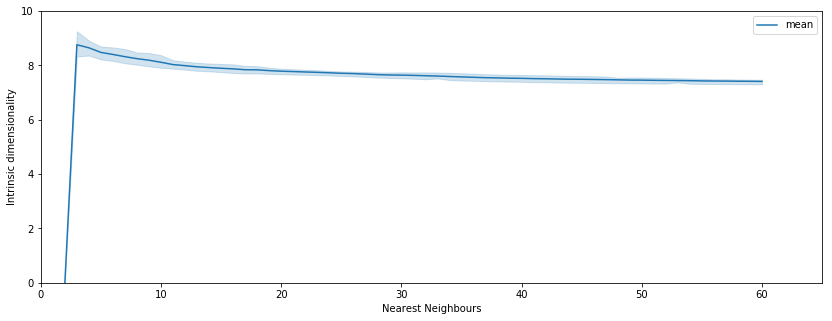

In [62]:
import seaborn as sns

plt.figure(figsize=(14, 5))

obj = sns.lineplot(x='Nearest Neighbours', y='Intrinsic dimensionality', 
                   data=df, legend='brief', label='mean')

axes = obj.axes
axes.set_ylim(0, 10)
axes.set_xlim(0, 65)

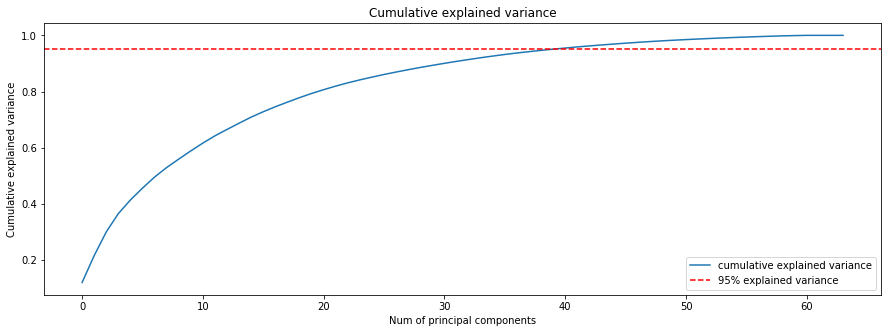

In [63]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)

plt.figure(figsize=(15,5))
plt.plot(pca.explained_variance_ratio_.cumsum(), label='cumulative explained variance')
plt.axhline(y=.95, label='95% explained variance', c='r', linestyle='--')
plt.legend()
plt.title('Cumulative explained variance')
plt.xlabel('Num of principal components')
plt.ylabel('Cumulative explained variance');

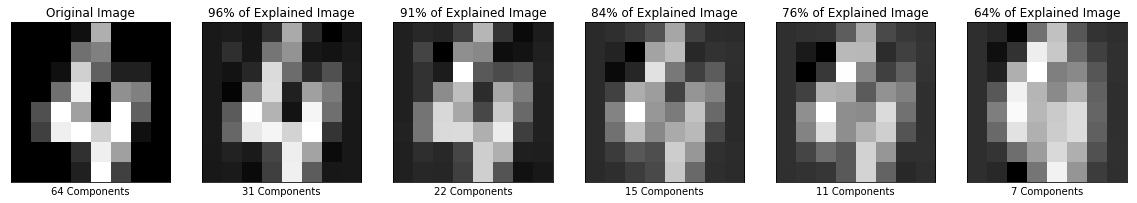

In [64]:
fig, axes = plt.subplots(ncols=6, figsize=(20, 5))

for n, ax in zip([64, 31, 22, 15, 11, 7], axes):
    pca = PCA(n)
    exp = pca.inverse_transform(pca.fit_transform(digits.data))
    ax.imshow(exp[4].reshape(8,8), cmap='gray')
    ax.set_xlabel('{} Components'.format(n))
    if n == 64:
        ax.set_title('Original Image')
    else:
        ax.set_title('{:.0f}% of Explained Image'.format(pca.explained_variance_ratio_.sum()*100))
    ax.set_xticks([], [])
    ax.set_yticks([], [])

<br>

### Task 3.2 (3 pt.)

Here we will visualize the decomposition, to observe how the data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracies on the new features. 

1. **(1 pt.)** Visualise ICA, PCA and Isomap 3D decomposition on 3 components in `plotly`. Be sure that the data is whitened (scaled). 
2. **(1 pt.)** Calculate new features of the data with ICA, PCA, and Isomap. **Choose the number of components according to your estimation of intrinsic dimention, see Task 3.1**. Calculate the classification accuracy on these features with `LogisticRegression` on cv=5, 3 repeats. Use `RepeatedKFold` and fix the `random_seed=0`.
3. **(1 pt.)** Show that `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test (for example `scipy.stats.ttest_ind`). Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.

In [65]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
import colorlover as cl
import pandas as pd
import sklearn.manifold 

from sklearn.decomposition import FastICA, PCA
from sklearn.manifold import Isomap

init_notebook_mode(connected=True)

iso = Isomap(n_neighbors=5, n_components=3, eigen_solver='dense')
pca = PCA(n_components=3, whiten=True)
ica = FastICA(n_components=3, whiten=True)

### BEGIN Solution

iso_res = iso.fit_transform(data)
pca_res = pca.fit_transform(data)
ica_res = ica.fit_transform(data)


### END Solution

In [66]:
data = [
    go.Scatter3d(x=pca_res[:,0], y=pca_res[:,1], z=pca_res[:,2], mode='markers', 
                 marker=dict(color=digits.target, size=5, opacity=0.8, 
                             colorscale='Jet', colorbar=dict(title='Digit')))
]
layout = go.Layout(title = 'PCA', margin=dict(l=0, r=0, b=10, t=30))
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

In [67]:
data = [
    go.Scatter3d(x=ica_res[:,0], y=ica_res[:,1], z=ica_res[:,2], mode='markers', 
                 marker=dict(color=digits.target, size=5, opacity=0.8, colorscale='Jet', colorbar=dict(title='Digit')))
]
layout = go.Layout(title = 'ICA', margin=dict(l=0, r=0, b=10, t=30))
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

In [68]:
data = [
    go.Scatter3d(x=iso_res[:,0], y=iso_res[:,1], z=iso_res[:,2], mode='markers', 
                 marker=dict(color=digits.target, size=5, opacity=0.8, colorscale='Jet', colorbar=dict(title='Digit')))
]
layout = go.Layout(title = 'Isomap', margin=dict(l=0, r=0, b=10, t=30))
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

In [69]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial')
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

n=8

iso = Isomap(n_neighbors=10, n_components=n, eigen_solver='dense')
pca = PCA(n_components=n, whiten=True)
ica = FastICA(n_components=n, whiten=True)

df = pd.DataFrame(columns=['Method', 'Mean accuracy', 'STD'])
scores = {}

digits = datasets.load_digits()
data = StandardScaler().fit_transform(digits.data)

for i, model in enumerate([pca, ica, iso]):
    
    new_features = model.fit_transform(data)
    name = model.__class__.__name__
    scores[name] = cross_val_score(clf, new_features, digits.target, scoring = 'accuracy', 
                                   cv=rkf.split(new_features, digits.target))
    
    df.loc[i + 1, 'Method'] = name
    df.loc[i + 1, 'Mean accuracy'] = scores[name].mean()
    df.loc[i + 1, 'STD'] = scores[name].std()
    
df

Method Mean accuracy        STD
1      PCA      0.868666   0.017608
2  FastICA      0.721379  0.0348506
3   Isomap        0.9475  0.0115558

In [70]:
from scipy.stats import ttest_ind

p_values = {}
p_values['pca-ica'] = ttest_ind(scores['PCA'], scores['FastICA'], equal_var=False)[1]
p_values['iso-pca'] = ttest_ind(scores['Isomap'], scores['PCA'], equal_var=False)[1]

print('Statistically significant improvement of PCA decomposition over ICA: p-value {}'.format(p_values['pca-ica']))
print('Statistically significant improvement of Isomap decomposition over PCA: p-value {}'.format(p_values['iso-pca']))

Statistically significant improvement of PCA decomposition over ICA: p-value 4.295893547885721e-12
Statistically significant improvement of Isomap decomposition over PCA: p-value 4.2587211269045403e-13


<br>

Isomap shows the best result because it is Manifold Learning algorithm (nonlinear dimensionality reduction instead of linear one in PCA/ICA). We can see, that statistically, Isomap has more stable result.

### Task 3.3* (4 pt.). Bonus.

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist (Kuzushiji-MNIST (10 classes, 28x28, 70k examples)). You are to engineer new features with any convenient method of Manifold Learning to increase the classification accuracy. Use the $k$NN classifier and validation code from here https://github.com/rois-codh/kmnist/blob/master/benchmarks/kuzushiji_mnist_knn.py. Your accuracy on the test should be more than `91.56%`.

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

In [71]:
import numpy as np

In [78]:
X_train, y_train = np.load('data/kmnist-train-imgs.npz')['arr_0'], np.load('data/kmnist-train-labels.npz')['arr_0']
X_test, y_test = np.load('data/kmnist-test-imgs.npz')['arr_0'], np.load('data/kmnist-test-labels.npz')['arr_0']

In [79]:
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

In [80]:
pca = PCA(n_components=37)

X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
model.fit(X_train_transformed, y_train)

score = model.score(X_test_transformed, y_test)

print('Components {}, Accuracy {}'.format(37, score))

Components 37, Accuracy 0.9287


There are the result of some attempts.
Other methods stayed at Google Colab. They are too slowly and n_components founded not on the localhost.